## Build a Model to predict id the client has subscribed to term deposit or not.
## Output variable -> y
## y -> Whether the client has subscribed a term deposit or not 
## Binomial ("yes" or "no")
### Use Dataset [banks-full.csv]

Attribute information For bank dataset

   Input variables:
   ###### bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   ###### related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
  ###### other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means     client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  ###### Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

  ###### Missing Attribute Values: None

### Importing Required Libraries & Dataset

In [29]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [30]:
# Importing Dateset
bank = pd.read_csv(r"C:\Vishal\ExcelR\Data Science\Assignments\bank-full.csv", sep = ';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Exploratory Data Analysis

<AxesSubplot:xlabel='y', ylabel='count'>

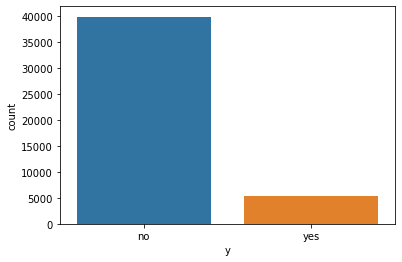

In [31]:
sns.countplot(x = 'y', data = bank)

In [32]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [33]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [34]:
# Applying label Encoding for Categrical Variables
label_encoder = LabelEncoder()
bank["job"] = label_encoder.fit_transform(bank["job"])
bank["marital"] = label_encoder.fit_transform(bank["marital"])
bank["education"] = label_encoder.fit_transform(bank["education"])  
bank["default"] = label_encoder.fit_transform(bank["default"])
bank["housing"] = label_encoder.fit_transform(bank["housing"]) 
bank["loan"] = label_encoder.fit_transform(bank["loan"])
bank["contact"] = label_encoder.fit_transform(bank["contact"])
bank["month"] = label_encoder.fit_transform(bank["month"])
bank["poutcome"] = label_encoder.fit_transform(bank["poutcome"])
bank["y"] = label_encoder.fit_transform(bank["y"])
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [35]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  y          45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


In [36]:
# Eliminating the 'contact' column as it's not required
bank.drop('contact', inplace = True, axis = 1)

In [37]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,5,8,198,1,-1,0,3,0


### Correlation Analysis

In [38]:
bank.corr()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348
month,-0.042357,-0.092870,-0.006991,-0.057304,0.011486,0.019777,0.271481,0.022145,-0.006028,1.000000,0.006314,-0.110031,0.033065,0.022727,-0.033038,-0.024471


<AxesSubplot:>

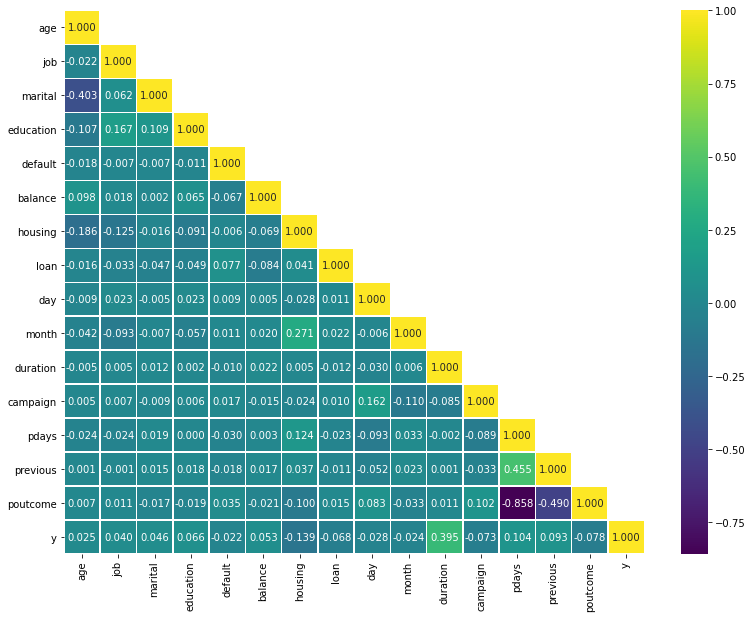

In [39]:
import numpy as np
fig, ax = plt.subplots(figsize = (13,10))
mask = np.zeros_like(bank.corr())
mask[np.triu_indices_from(mask, 1)] = True
sns.heatmap(bank.corr(), annot = True,mask = mask, cmap = 'viridis',linewidths = 0.5,ax = ax, fmt = '.3f')

### Model Building

In [40]:
x = bank.iloc[:, :15]
y = bank['y']
Model = LogisticRegression()

In [41]:
Model.fit(x,y)

C:\Users\chaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Making Predictions Using Model

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [43]:
Model.fit(x_test, y_test)

C:\Users\chaud\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_test_pred = Model.predict(x_test)
y_test_pred

array([0, 0, 1, ..., 0, 0, 0])

In [45]:
# Predicting using complete data
y_pred = Model.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

### Testing Model Accuracy

In [46]:
# Classification report
from sklearn.metrics import classification_report
classification_report(y_test, y_test_pred)

'              precision    recall  f1-score   support\n\n           0       0.90      0.99      0.94     12013\n           1       0.53      0.12      0.20      1551\n\n    accuracy                           0.89     13564\n   macro avg       0.71      0.56      0.57     13564\nweighted avg       0.85      0.89      0.85     13564\n'

In [47]:
# Creating confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[11841,   172],
       [ 1358,   193]], dtype=int64)

In [48]:
# Calculating accuracy of the model
from sklearn.metrics import accuracy_score
print('Accuracy of Model is: ', accuracy_score(y_test, y_test_pred))

Accuracy of Model is:  0.8872014155116484


In [49]:
# As accuracy = 0.8872, which is greater than 0.5; Thus [:,1] Threshold value>0.5=1 else [:,0] Threshold value<0.5=0 
Model.predict_proba(x)[:,1]

array([0.05670889, 0.05581034, 0.0676467 , ..., 0.22004775, 0.06268455,
       0.1871329 ])

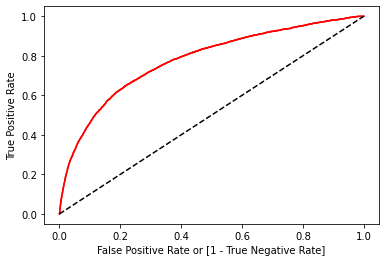

auc accuracy: 0.5577191556812395


In [50]:
# ROC Curve plotting and finding AUC value
fpr,tpr,thresholds = roc_curve(y,Model.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color = 'red')
auc = roc_auc_score(y,y_pred)

plt.plot(fpr,tpr,color = 'red',label = 'Logistic Regression Model(area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)